# Cape Town Fire Incidents Data Analysis

This is a project of finding insights on the fire incidents in Cape Town. 
This dataset can be access on the URL: https://web1.capetown.gov.za/web1/OpenDataPortal/DatasetDetail?DatasetName=Fire%20incidence.
We also use Natural Processing Lanaguage to understand the caller statements when they were reporting the fire incidents.
        

In [202]:
#Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
#Set default visualization
%matplotlib inline
sns.set()

In [204]:
#Import the dataset
df = pd.read_csv("veg_data.csv", sep = ";", low_memory = False, encoding = "iso-8859-1")

In [205]:
#Retrive the first 5 observations of the dataset
df.head()

,Incident_Number,Incident_Category,Incident_Sub_Category,Date_Of_IncidentD,Time_Of_IncidentMT,Method_Incident_Notified,Callers_Statement,Location,Complex,Street,...,Pumping_Time,Fire_Damage_Details,Forced_Entry,Remarks,Accoun_ For,District,Station_Responded,Fire_Category,Incident_Management(Y/N),NESD_Update_Control
0,F0901/0001,Other,Rubbish/Grass/Bush,2009/01/01,00:03|00:04|00:04|00:04,Telephone,Vegetation Alight,NaN,NaN,BUREN STREET,...,NaN,NaN,NaN,NaN,NaN,North,Milnerton,Category 1|No Charge,NaN,1.294044e+09
1,F0901/0002,Other,Rubbish/Grass/Bush,2009/01/01,00:07|00:08|00:08|00:08,Telephone,Reeds Alight,Sandvlei Wetland Reserve,NaN,Lake Road,...,00:30,Small Area Of Reeds Burnt.,No,NaN,NaN,West,Lakeside,"Category 2|Bush, Grass, Vegetation",N,1.384005e+09
2,F0901/0004,Other,Rubbish/Grass/Bush,2009/01/01,00:16|00:17|00:17|00:17,Telephone,Vegetation Alight,Close To The Indoor Centre,Sportsfield,Tafelberg Road,...,00:16,NaN,No,NaN,NaN,East,Lansdowne,"Category 2|Bush, Grass, Vegetation",N,1.353403e+09
3,F0901/0006,Other,Rubbish/Grass/Bush,2009/01/01,00:20|00:21|00:21|00:21,Telephone,Vegetation Alight,NaN,Protea Park,Karria Street,...,NaN,NaN,NaN,NaN,NaN,North,Atlantis,"Category 2|Bush, Grass, Vegetation",N,1.294044e+09
4,F0901/0007,Other,Rubbish/Grass/Bush,2009/01/01,00:22|00:22|00:22|00:22,Telephone,Tyres Alight,NaN,NaN,JAKKALSVLEI AVENUE,...,00:05,Small Quantity Of Tyres Burned,NaN,NaN,NaN,North,Epping,"Category 2|Bush, Grass, Vegetation",N,1.467973e+09


In [206]:
#Retrieve the last 5 observationsof the dataset
df.tail()

,Incident_Number,Incident_Category,Incident_Sub_Category,Date_Of_IncidentD,Time_Of_IncidentMT,Method_Incident_Notified,Callers_Statement,Location,Complex,Street,...,Pumping_Time,Fire_Damage_Details,Forced_Entry,Remarks,Accoun_ For,District,Station_Responded,Fire_Category,Incident_Management(Y/N),NESD_Update_Control
66710,F1601/0465,Other,Rubbish/Grass/Bush,2016/01/05,00:16|00:16|00:16|00:16,Other,Vegetation Fire,KLIPFONTEIN MISSION STATION,NaN,LANSDOWNE ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66711,F1601/0466,Other,Rubbish/Grass/Bush,2016/01/05,01:37|01:37|01:37|01:37,Telephone,Vegetation Fire,NaN,NaN,GUSTROUW AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66712,F1601/0473,Other,Rubbish/Grass/Bush,2016/01/05,07:00|07:02|07:02|07:02,Telephone,Vegetation Fire - Camera 215,NaN,NaN,. N . 2 OUTGOING (BETWEEN BORCHERDS QUARRY & R...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66713,F1601/0474,Other,Rubbish/Grass/Bush,2016/01/05,07:05|07:06|07:06|07:06,Other,Vegetation Alight,NaN,NaN,QUARRY HILL ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66714,F1601/0476,Other,Rubbish/Grass/Bush,2016/01/05,07:26|07:27|07:27|07:27,Telephone,Vegetation Fire,NaN,NaN,. N . 2 OUTGOING (BETWEEN BADEN POWELL DR & MA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
#The shape of the dataset
df.shape

(66715, 43)

In [208]:
#The names of the features in the dataset
df.columns

Index(['Incident_Number ', 'Incident_Category', 'Incident_Sub_Category',
       'Date_Of_IncidentD', 'Time_Of_IncidentMT', 'Method_Incident_Notified',
       'Callers_Statement', 'Location', 'Complex ', 'Street', 'Suburb', 'Town',
       'Map_Page', 'Grid', 'Cross_Roads ', 'Statistics_Area ', 'Station_Area',
       'Vehicles _Elapsed_TimesMT', 'FPA_Classification', 'FPA_Occupancy',
       'Weather ', 'Wind', 'Temperature ', 'What_Was_Burning',
       'Description_Of_Incident ', 'Actions_Prior_To_Arrival',
       'Actions_Of_Brigade', 'Equipment_Used', 'FPA_Suspected_Cause ',
       'Details_Of_Cause', 'Water_Used_(Charged)_MR',
       'Water_Used_(Uncharged)_MR', 'Source_Of_Water ', 'Pumping_Time',
       'Fire_Damage_Details', 'Forced_Entry', 'Remarks ', 'Accoun_ For ',
       'District', 'Station_Responded', 'Fire_Category',
       'Incident_Management(Y/N)', 'NESD_Update_Control'],
      dtype='object')

In [209]:
#The information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66715 entries, 0 to 66714
Data columns (total 43 columns):
Incident_Number              66715 non-null object
Incident_Category            66715 non-null object
Incident_Sub_Category        66715 non-null object
Date_Of_IncidentD            66714 non-null object
Time_Of_IncidentMT           66686 non-null object
Method_Incident_Notified     65886 non-null object
Callers_Statement            65056 non-null object
Location                     25877 non-null object
Complex                      294 non-null object
Street                       66112 non-null object
Suburb                       66306 non-null object
Town                         65665 non-null object
Map_Page                     60998 non-null object
Grid                         59383 non-null object
Cross_Roads                  25554 non-null object
Statistics_Area              5417 non-null object
Station_Area                 66666 non-null object
Vehicles _Elapsed_TimesMT  

In [210]:
#Descriptive statstics of the dataset
df.describe()

,Remarks,Accoun_ For,NESD_Update_Control
count,12947.0,26195.0,5.706400e+04
mean,1.0,1.0,1.416777e+09
std,0.0,0.0,6.338185e+07
min,1.0,1.0,1.294042e+09
25%,1.0,1.0,1.373966e+09
50%,1.0,1.0,1.419331e+09
75%,1.0,1.0,1.475406e+09
max,1.0,1.0,1.515223e+09


In [211]:
#Statistical summary on categorical variable
df.describe(include = 'object')

,Incident_Number,Incident_Category,Incident_Sub_Category,Date_Of_IncidentD,Time_Of_IncidentMT,Method_Incident_Notified,Callers_Statement,Location,Complex,Street,...,Water_Used_(Charged)_MR,Water_Used_(Uncharged)_MR,Source_Of_Water,Pumping_Time,Fire_Damage_Details,Forced_Entry,District,Station_Responded,Fire_Category,Incident_Management(Y/N)
count,66715,66715,66715,66714,66686,65886,65056,25877,294,66112,...,40192,1724,40887,40956,36195,4236,65759,65759,65760,52228
unique,66712,2,16,2559,9260,31,6322,11589,283,13338,...,1564,220,264,479,7156,198,25,2735,60,2
top,F0901/2945,Other,Rubbish/Grass/Bush,2011/11/07,14:18|14:19|14:19|14:19,Telephone,Vegetation Alight,KLIPFONTEIN MISSION STATION,23,LANSDOWNE ROAD,...,1200,600,MP,00:10,A Small Area Of Vegetation Burned,No,East,Belhar,"Category 2|Bush, Grass, Vegetation",N
freq,2,66678,59506,130,73,50303,24489,306,3,879,...,4186,223,22675,6395,2121,3073,28336,4304,39286,51474


In [212]:
# Check missing values in the dataset
df.isna().sum()

Incident_Number                  0
Incident_Category                0
Incident_Sub_Category            0
Date_Of_IncidentD                1
Time_Of_IncidentMT              29
Method_Incident_Notified       829
Callers_Statement             1659
Location                     40838
Complex                      66421
Street                         603
Suburb                         409
Town                          1050
Map_Page                      5717
Grid                          7332
Cross_Roads                  41161
Statistics_Area              61298
Station_Area                    49
Vehicles _Elapsed_TimesMT      344
FPA_Classification            1345
FPA_Occupancy                10141
Weather                      16196
Wind                         16594
Temperature                  16343
What_Was_Burning             17083
Description_Of_Incident       7557
Actions_Prior_To_Arrival     45364
Actions_Of_Brigade            8034
Equipment_Used               13112
FPA_Suspected_Cause 

# Exploratory Data Analysis (EDA)

In [213]:
#Convert data to proper format
df['Date_Of_IncidentD'] = pd.to_datetime(df['Date_Of_IncidentD'])

In [214]:
#Checking data types of date has been changed
df.dtypes

Incident_Number                      object
Incident_Category                    object
Incident_Sub_Category                object
Date_Of_IncidentD            datetime64[ns]
Time_Of_IncidentMT                   object
Method_Incident_Notified             object
Callers_Statement                    object
Location                             object
Complex                              object
Street                               object
Suburb                               object
Town                                 object
Map_Page                             object
Grid                                 object
Cross_Roads                          object
Statistics_Area                      object
Station_Area                         object
Vehicles _Elapsed_TimesMT            object
FPA_Classification                   object
FPA_Occupancy                        object
Weather                              object
Wind                                 object
Temperature                     

In [215]:
#Checking unique values for method of incident notification
df.Method_Incident_Notified.unique()

array(['Telephone', 'Radio', 'Verbally', 'Other', 'Alarm',
       '21|Municipal Fire Alarm|REMRAD', 'T', nan,
       '74|Computer data transfer (NISECS)|NISECS - T', '11 Telephone',
       '||Telephone|T', 'Direct 107', 'By Radio',
       '13|direct 107|direct "107" Call|d""', 'Tel', 'Telephonee Direct',
       'TELEPHONE', 'Camera EVS', 'Atlantis Fire', 'Camera AVS',
       '||Direct 107" call|D"', 'Telelphone Direct', 'By Radio E01a',
       'Telephoneed', 'Direct', 'Vegetation Alight', 'Telepphone Direct',
       'Telehone Direct', 'Telephonet', 'Telphone Direct',
       'Telephopne Direct', '1|Telephone|Direct 107" call|D"'],
      dtype=object)

In [216]:
#Changing observations into the correct values
mappings = {'T':'Telephone',
            '11 Telephone':'Telephone',
            'Telephoneed':'Telephone',
            'Telelphone Direct':'Telephone',
            'Tel':'Telephone',
            '||Telephone|T':'Telephone',
            'Telephonee Direct':'Telephone',
            'TELEPHONE':'Telephone',
            'Telepphone Direct': 'Telephone',
            'Telehone Direct':'Telephone',
            'Telephonet':'Telephone',
            'Telphone Direct':'Telephone',
            'Telephopne Direct':'Telephone',
            '1|Telephone|Direct 107" call|D"':'Telephone',
            '21|Municipal Fire Alarm|REMRAD':'Alarm',
            'By Radio':'Radio',
            'By Radio E01a':'Radio',
            '74|Computer data transfer (NISECS)|NISECS - T':'Other',
            '13|direct 107|direct "107" Call|d""':'Other',
            'Direct 107':'Other',
             'Camera EVS':'Camera',
            'Camera AVS':'Camera',
            'Atlantis Fire':'Other',
            '||Direct 107" call|D"':'Other',
            'Direct':'Other',
            'Vegetation Alight':'Other'}

# Replace values and collapse data
df['Method_Incident_Notified'] = df['Method_Incident_Notified'].replace(mappings)
df['Method_Incident_Notified'].unique()

array(['Telephone', 'Radio', 'Verbally', 'Other', 'Alarm', nan, 'Camera'],
      dtype=object)

In [217]:
#Count number of incident notification
vc = df['Method_Incident_Notified'].value_counts()

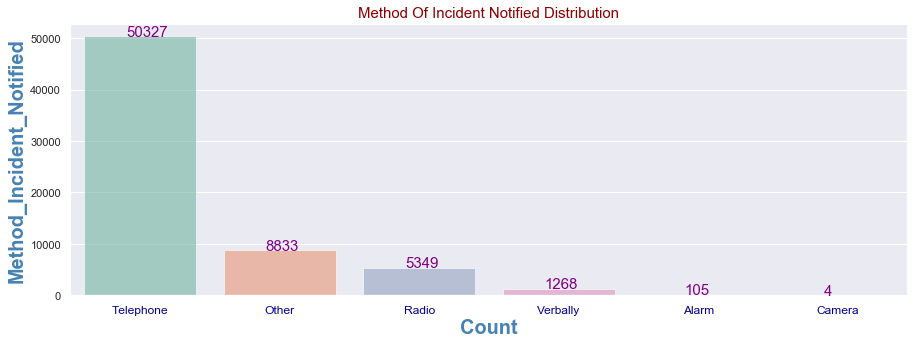

In [218]:
#Bar graph of the incident notification
plt.figure(figsize=(15,5))
sns.countplot(x = 'Method_Incident_Notified', data = df, order = vc.index, palette = 'Set2', alpha = 0.6)
plt.xlabel('Count', size = 20, color = 'steelblue',weight = 'bold')
plt.ylabel('Method_Incident_Notified', size = 20, color = 'steelblue',weight = 'bold')
plt.xticks( color = 'darkblue', size = 12, rotation = 0)
plt.title('Method Of Incident Notified Distribution', size = 15, color = 'darkred', weight = 'medium')
for i in range(len(vc)) :
    plt.annotate(vc[i], xy = (i-0.1,vc[i]), size = 15, color = 'purple')
plt.show()

In [219]:
#Value counts for incident management
vc_inc = df['Incident_Management(Y/N)'].value_counts()
vc_inc

N    51474
Y      754
Name: Incident_Management(Y/N), dtype: int64

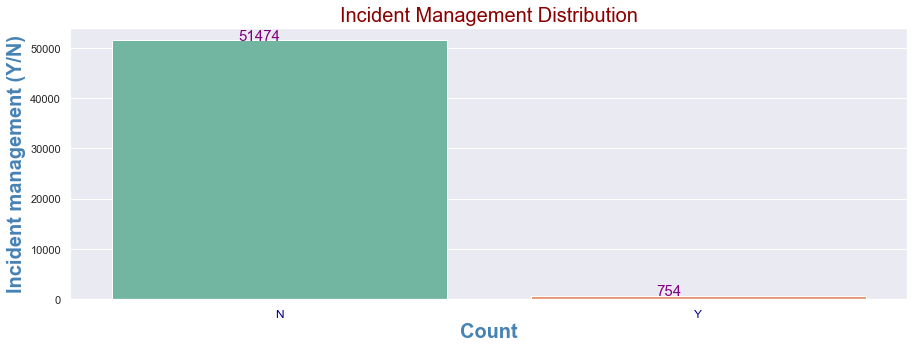

In [220]:
#Bar graph of the incident management
plt.figure(figsize=(15,5))
sns.countplot(x = 'Incident_Management(Y/N)', data = df, order = vc_inc.index, palette = 'Set2')
plt.xlabel('Count', size = 20, color = 'steelblue',weight = 'bold')
plt.ylabel('Incident management (Y/N)', size = 20, color = 'steelblue',weight = 'bold')
plt.xticks( color = 'darkblue', size = 12, rotation = 0)
plt.title('Incident Management Distribution', size = 20, color = 'darkred', weight = 'medium')
for i in range(len(vc_inc)) :
    plt.annotate(vc_inc[i], xy = (i-0.1,vc_inc[i]), size = 15, color = 'purple')
plt.show()

In [221]:
#Count the number of observations in the sub category category
vc_subcat = df['Incident_Sub_Category'].value_counts()
vc_subcat

Rubbish/Grass/Bush             59506
Miscellaneous                   7100
Plantation/Forest                 31
Agriculture                       29
Complaints                        12
Code Call                          9
Emergency Services Exercise        8
Airport Phase 1                    5
Vegetation                         4
Vegetation Alight                  2
Rubbish/Grass                      2
Out Of Area Hazmat                 2
Rubbish                            2
Rubbish/Grasss/Bush                1
Airport - General Alert            1
Fill Underground Tank              1
Name: Incident_Sub_Category, dtype: int64

In [222]:
#Replacing values with clean corrected values
sub_cat_mappings = {'Rubbish':'Rubbish/Grass/Bush',
                    'Rubbish/Grass':'Rubbish/Grass/Bush',
                    'Rubbish/Grasss/Bush':'Rubbish/Grass/Bush',
                    'Vegetation Alight':'Vegetation',
                    'Airport Phase 1':'Airport',
                    'Airport - General Alert':'Airport'}

df['Incident_Sub_Category'] = df['Incident_Sub_Category'].replace(sub_cat_mappings)
df['Incident_Sub_Category'].value_counts()

Rubbish/Grass/Bush             59511
Miscellaneous                   7100
Plantation/Forest                 31
Agriculture                       29
Complaints                        12
Code Call                          9
Emergency Services Exercise        8
Airport                            6
Vegetation                         6
Out Of Area Hazmat                 2
Fill Underground Tank              1
Name: Incident_Sub_Category, dtype: int64

In [223]:
#Top 5 fire categories
df_fire_cat = df['Fire_Category'].value_counts()[:5]
df_fire_cat

Category 2|Bush, Grass, Vegetation                     39286
Category 1|No Charge                                   20140
Category 2|Rubbish                                      4537
Category 2|No Charge                                     916
Category 2|Lamp Standards/Transformers/Sub Stations      231
Name: Fire_Category, dtype: int64

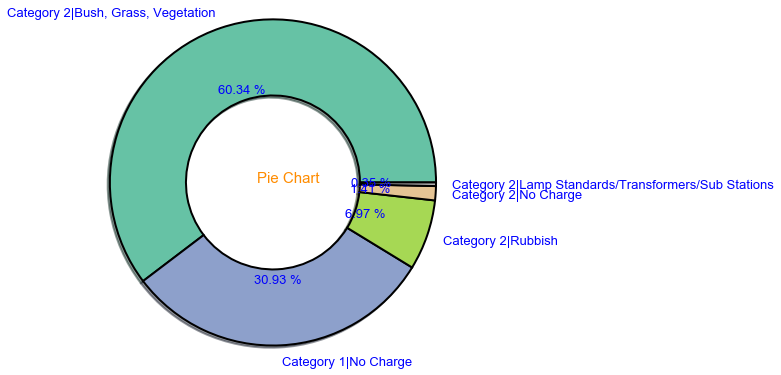

In [224]:
#Pie chart for categories
plt.figure(figsize = (15,5))
df_fire_cat.plot.pie(radius = 1.5, cmap = 'Set2', 
            autopct = '%.2f %%', textprops = {'size' : 13, 'color' : 'blue'},
            wedgeprops = {'linewidth' : 2, 'edgecolor':'black', 'width' : .70},
            shadow = True)
plt.ylabel('')
plt.annotate('Pie Chart', xy = (-0.15,0), size = 15, color = 'darkorange')
plt.show()

In [225]:
#Incidents submitted in year 2016
df[df['Date_Of_IncidentD'] >= '2016-01-01'].head()

,Incident_Number,Incident_Category,Incident_Sub_Category,Date_Of_IncidentD,Time_Of_IncidentMT,Method_Incident_Notified,Callers_Statement,Location,Complex,Street,...,Pumping_Time,Fire_Damage_Details,Forced_Entry,Remarks,Accoun_ For,District,Station_Responded,Fire_Category,Incident_Management(Y/N),NESD_Update_Control
66487,F1601/0001,Other,Rubbish/Grass/Bush,2016-01-01,00:07|00:07|00:07|00:07,Telephone,Vegetation Alight,Gulden Park,NaN,GULDEN CRESCENT,...,NaN,False Alarm With Good Intent,NaN,1.0,NaN,East,Strand,Category 1|No Charge,NaN,1.514979e+09
66488,F1601/0004,Other,Miscellaneous,2016-01-01,00:15|00:16|00:16|00:16,Telephone,Tyres Alight,KLIPHEUWEL INFORMAL,NaN,KLIPHEUWEL ROAD,...,NaN,Small Quantity Of Tyres Burned,NaN,NaN,NaN,North,Durbanville,Category 1|No Charge,NaN,1.515152e+09
66489,F1601/0005,Other,Rubbish/Grass/Bush,2016-01-01,00:17|00:17|00:17|00:17,Other,Vegetation Alight,64,NaN,JUSTICE WALK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66490,F1601/0006,Other,Rubbish/Grass/Bush,2016-01-01,00:22|00:23|00:23|00:23,Telephone,Vegetation FIRE,NaN,NaN,MAKABENI ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66491,F1601/0010,Other,Miscellaneous,2016-01-01,00:49|00:50|00:50|00:50,Other,Tyres Alight,NaN,NaN,NORWOOD ROAD,...,NaN,NaN,NaN,NaN,NaN,North,Goodwood,Category 1|No Charge,N,NaN


In [226]:
#Incident submitted in 2016 and incident notified is equal to other
df[(df['Date_Of_IncidentD'] >= '2016-01-01') & (df['Method_Incident_Notified'] >= 'Other')].head()

,Incident_Number,Incident_Category,Incident_Sub_Category,Date_Of_IncidentD,Time_Of_IncidentMT,Method_Incident_Notified,Callers_Statement,Location,Complex,Street,...,Pumping_Time,Fire_Damage_Details,Forced_Entry,Remarks,Accoun_ For,District,Station_Responded,Fire_Category,Incident_Management(Y/N),NESD_Update_Control
66487,F1601/0001,Other,Rubbish/Grass/Bush,2016-01-01,00:07|00:07|00:07|00:07,Telephone,Vegetation Alight,Gulden Park,NaN,GULDEN CRESCENT,...,NaN,False Alarm With Good Intent,NaN,1.0,NaN,East,Strand,Category 1|No Charge,NaN,1.514979e+09
66488,F1601/0004,Other,Miscellaneous,2016-01-01,00:15|00:16|00:16|00:16,Telephone,Tyres Alight,KLIPHEUWEL INFORMAL,NaN,KLIPHEUWEL ROAD,...,NaN,Small Quantity Of Tyres Burned,NaN,NaN,NaN,North,Durbanville,Category 1|No Charge,NaN,1.515152e+09
66489,F1601/0005,Other,Rubbish/Grass/Bush,2016-01-01,00:17|00:17|00:17|00:17,Other,Vegetation Alight,64,NaN,JUSTICE WALK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66490,F1601/0006,Other,Rubbish/Grass/Bush,2016-01-01,00:22|00:23|00:23|00:23,Telephone,Vegetation FIRE,NaN,NaN,MAKABENI ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66491,F1601/0010,Other,Miscellaneous,2016-01-01,00:49|00:50|00:50|00:50,Other,Tyres Alight,NaN,NaN,NORWOOD ROAD,...,NaN,NaN,NaN,NaN,NaN,North,Goodwood,Category 1|No Charge,N,NaN


In [227]:
#Groupby of incident notified vs sub category
df.groupby(['Method_Incident_Notified'])['Incident_Sub_Category'].count().reset_index(name ='Number of incident sub category')

,Method_Incident_Notified,Number of incident sub category
0,Alarm,105
1,Camera,4
2,Other,8833
3,Radio,5349
4,Telephone,50327
5,Verbally,1268


In [228]:
#Groupby of incident vategory vs fire category and incident method notification
df.groupby(['Incident_Category','Fire_Category','Method_Incident_Notified'])['Method_Incident_Notified'].count().reset_index(name ='Method incident notified')

,Incident_Category,Fire_Category,Method_Incident_Notified,Method incident notified
0,Other,"Bush, Grass, Vegetation",Other,1
1,Other,"Bush, Grass, Vegetation",Telephone,7
2,Other,Category 1|No Charge,Alarm,36
3,Other,Category 1|No Charge,Other,2892
4,Other,Category 1|No Charge,Radio,1140
5,Other,Category 1|No Charge,Telephone,15448
6,Other,Category 1|No Charge,Verbally,336
7,Other,Category 1|No Charge|No Charge,Telephone,4
8,Other,Category 2,Other,2
9,Other,Category 2,Telephone,4


In [229]:
#Groupby of incident sub category vs incident method notification
df.groupby(['Incident_Sub_Category','Method_Incident_Notified'])['Incident_Management(Y/N)'].count().reset_index(name ='Incident_Management (Y/N)')

,Incident_Sub_Category,Method_Incident_Notified,Incident_Management (Y/N)
0,Agriculture,Other,1
1,Agriculture,Radio,6
2,Agriculture,Telephone,13
3,Agriculture,Verbally,3
4,Airport,Telephone,3
5,Code Call,Alarm,0
6,Code Call,Telephone,5
7,Complaints,Telephone,10
8,Emergency Services Exercise,Telephone,6
9,Fill Underground Tank,Telephone,0


In [230]:
#Group by date, fire category, notification method and incident category
df.groupby(['Date_Of_IncidentD','Fire_Category','Method_Incident_Notified','Incident_Category'])['Incident_Category'].count().reset_index(name ='Incident Category')

,Date_Of_IncidentD,Fire_Category,Method_Incident_Notified,Incident_Category,Incident Category
0,2009-01-01,Category 1|No Charge,Radio,Other,4
1,2009-01-01,Category 1|No Charge,Telephone,Other,13
2,2009-01-01,"Category 2|Bush, Grass, Vegetation",Radio,Other,5
3,2009-01-01,"Category 2|Bush, Grass, Vegetation",Telephone,Other,43
4,2009-01-01,Category 2|Rubbish,Telephone,Other,3
5,2009-01-01,Category 3|Storage (Moderate Risk),Telephone,Other,1
6,2009-01-02,Category 1|No Charge,Radio,Other,1
7,2009-01-02,Category 1|No Charge,Telephone,Other,17
8,2009-01-02,"Category 2|Bush, Grass, Vegetation",Radio,Other,4
9,2009-01-02,"Category 2|Bush, Grass, Vegetation",Telephone,Other,32


In [231]:
#Compute proportion of Incident Category by Incident_Yes_No
incident_method = pd.crosstab(df['Incident_Category'],
                            df['Incident_Management(Y/N)'], normalize = 'index').reset_index()

incident_method[['Y','N']] = incident_method[['Y','N']] * 100
incident_method['Total'] = incident_method['Y'] + incident_method['N']
incident_method

Incident_Management(Y/N),Incident_Category,N,Y,Total
0,Other,98.55947,1.44053,100.0
1,Other Calls,92.00000,8.00000,100.0


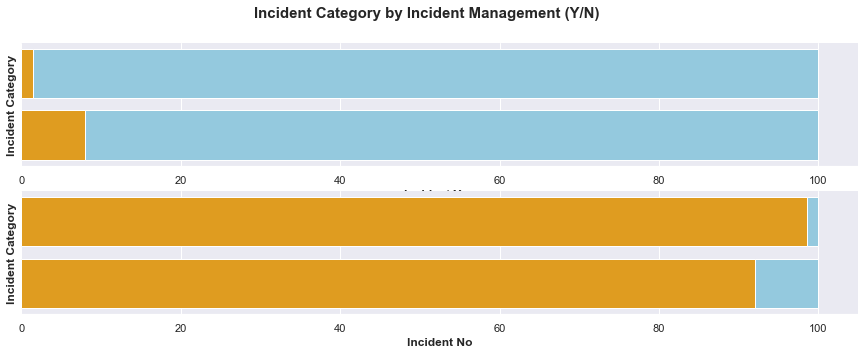

In [233]:
#Stacked bar plot
fig, axes = plt.subplots(2, 1, figsize=(15,5))
sns.barplot(x = 'Total', y = 'Incident_Category', data = incident_method, color = 'skyblue', ax = axes[0])
sns.barplot(x = 'Y', y = 'Incident_Category', data = incident_method, color = 'orange',ax = axes[0])
axes[0].set_xlabel('Incident Yes', fontsize = 12, fontweight = 'semibold')
axes[0].set_ylabel('Incident Category', fontsize = 12, fontweight = 'semibold')
axes[0].set_yticks([])


sns.barplot(x = 'Total', y = 'Incident_Category', data = incident_method, color = 'skyblue',ax = axes[1])
sns.barplot(x = 'N', y = 'Incident_Category', data = incident_method, color = 'orange',ax = axes[1])
axes[1].set_xlabel('Incident No', fontsize = 12, fontweight = 'semibold')
axes[1].set_ylabel('Incident Category', fontsize = 12, fontweight = 'semibold')
axes[1].set_yticks([])

sns.despine(left = True)
fig.suptitle('Incident Category by Incident Management (Y/N)', fontsize = 15, fontweight = 'semibold')
plt.show()

In [234]:
#Get not null values for nesd update control with for year 2016
df_update = df[(df.Date_Of_IncidentD >= '2016-01-01') & (df.NESD_Update_Control.notnull())]
df_update.head()

,Incident_Number,Incident_Category,Incident_Sub_Category,Date_Of_IncidentD,Time_Of_IncidentMT,Method_Incident_Notified,Callers_Statement,Location,Complex,Street,...,Pumping_Time,Fire_Damage_Details,Forced_Entry,Remarks,Accoun_ For,District,Station_Responded,Fire_Category,Incident_Management(Y/N),NESD_Update_Control
66487,F1601/0001,Other,Rubbish/Grass/Bush,2016-01-01,00:07|00:07|00:07|00:07,Telephone,Vegetation Alight,Gulden Park,NaN,GULDEN CRESCENT,...,NaN,False Alarm With Good Intent,NaN,1.0,NaN,East,Strand,Category 1|No Charge,NaN,1.514979e+09
66488,F1601/0004,Other,Miscellaneous,2016-01-01,00:15|00:16|00:16|00:16,Telephone,Tyres Alight,KLIPHEUWEL INFORMAL,NaN,KLIPHEUWEL ROAD,...,NaN,Small Quantity Of Tyres Burned,NaN,NaN,NaN,North,Durbanville,Category 1|No Charge,NaN,1.515152e+09
66492,F1601/0015,Other,Rubbish/Grass/Bush,2016-01-01,01:05|01:07|01:07|01:07,Telephone,Vegetation Alight,Fisantekraal,NaN,LICHTENBURG ROAD (R312),...,00:18,Small Area Of Vegetation Burned,NaN,NaN,1.0,North,Durbanville,"Category 2|Bush, Grass, Vegetation",NaN,1.515153e+09
66494,F1601/0027,Other,Rubbish/Grass/Bush,2016-01-01,02:25|02:27|02:27|02:27,Telephone,Vegetation FIRE,NaN,NaN,Weltevreden Road,...,00:10,A Small Quantity Of Rubbish Burned,NaN,NaN,1.0,East,Mitchells Plain,"Category 2|Bush, Grass, Vegetation",N,1.514864e+09
66496,F1601/0035,Other,Rubbish/Grass/Bush,2016-01-01,03:34|03:36|03:36|03:36,Radio,Vegetation Alight,NaN,NaN,TEAK ROAD,...,00:10,Quantity Of Rubbish Burnt.,NaN,1.0,1.0,North,Epping,Category 2|Rubbish,N,1.515057e+09


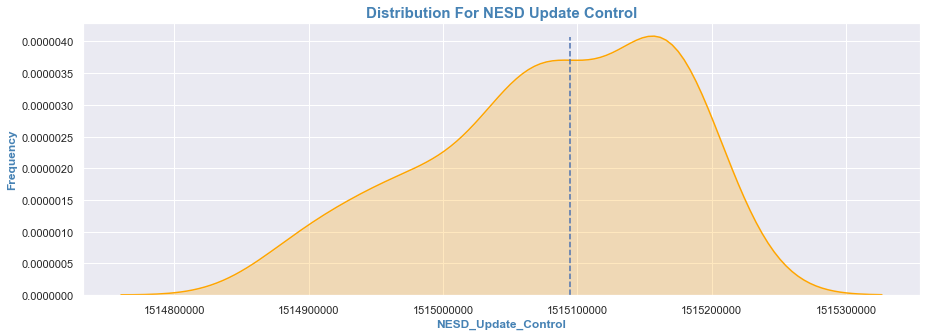

In [235]:
#Distribution plot for nesd update control
plt.figure(figsize=(15,5))
sns.distplot(df_update['NESD_Update_Control'], hist = False, kde_kws = {'shade':True}, color = 'orange')
plt.axvline(df_update['NESD_Update_Control'].median(), ymax=0.95, linestyle ="--")
plt.xlabel('NESD_Update_Control', size = 12, color = 'steelblue',weight = 'bold')
plt.ylabel('Frequency', size = 12, color = 'steelblue',weight = 'bold')
plt.title('Distribution For NESD Update Control', size = 15, color = 'steelblue', weight = 'bold')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

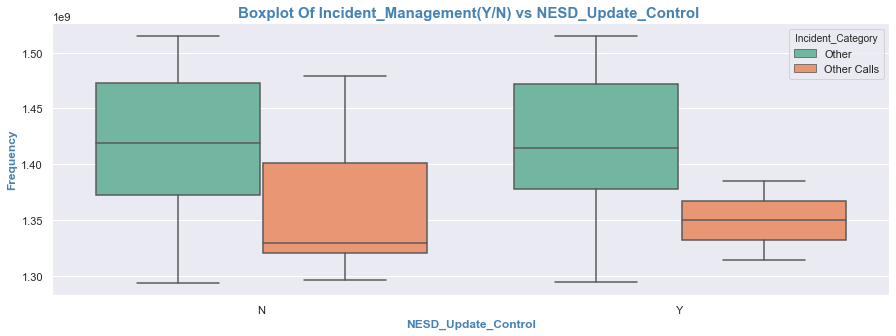

In [236]:
#Box plot for incident management vs nesd update control
plt.figure(figsize=(15,5))
sns.boxplot('Incident_Management(Y/N)','NESD_Update_Control', data = df,
            hue = 'Incident_Category',
           palette = 'Set2')
plt.xlabel('NESD_Update_Control', size = 12, color = 'steelblue',weight = 'bold')
plt.ylabel('Frequency', size = 12, color = 'steelblue',weight = 'bold')
plt.title('Boxplot Of Incident_Management(Y/N) vs NESD_Update_Control ', size = 15, color = 'steelblue', weight = 'bold')
plt.show()

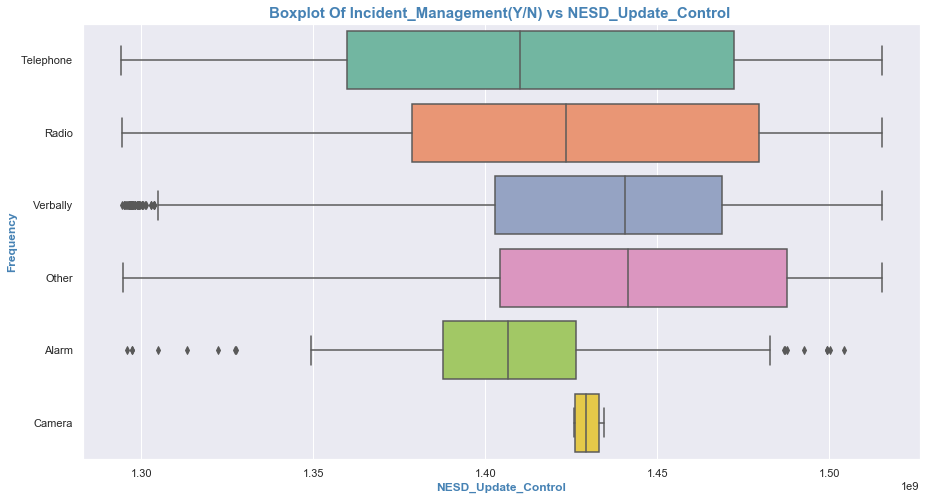

In [237]:
#Boxplot for nesd update control vs incident notified
plt.figure(figsize=(15,8))
sns.boxplot('NESD_Update_Control','Method_Incident_Notified', 
            data = df,
            palette = 'Set2')
plt.xlabel('NESD_Update_Control', size = 12, color = 'steelblue',weight = 'bold')
plt.ylabel('Frequency', size = 12, color = 'steelblue',weight = 'bold')
plt.title('Boxplot Of Incident_Management(Y/N) vs NESD_Update_Control ', size = 15, color = 'steelblue', weight = 'bold')
plt.show()

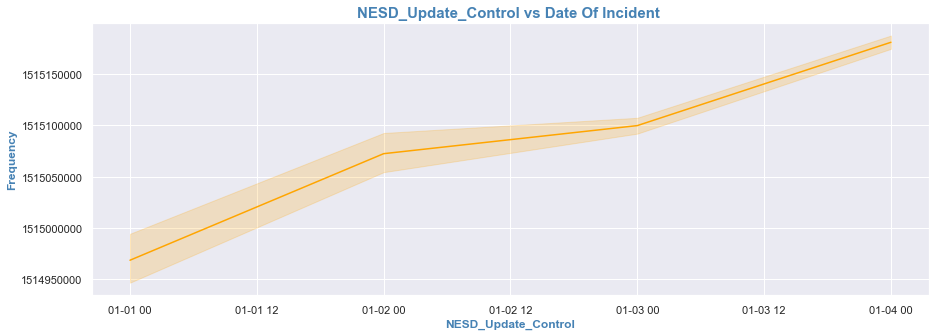

In [238]:
#Line port of date vs nesd update control
plt.figure(figsize=(15,5))
sns.lineplot(x = 'Date_Of_IncidentD', y = 'NESD_Update_Control',data = df_update, color ='orange')
plt.xlabel('NESD_Update_Control', size = 12, color = 'steelblue',weight = 'bold')
plt.ylabel('Frequency', size = 12, color = 'steelblue',weight = 'bold')
plt.title('NESD_Update_Control vs Date Of Incident ', size = 15, color = 'steelblue', weight = 'bold')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Text(0.5, 1.0, 'Swarm plot of Incident_Sub_Category by NESD_Update_Control ')

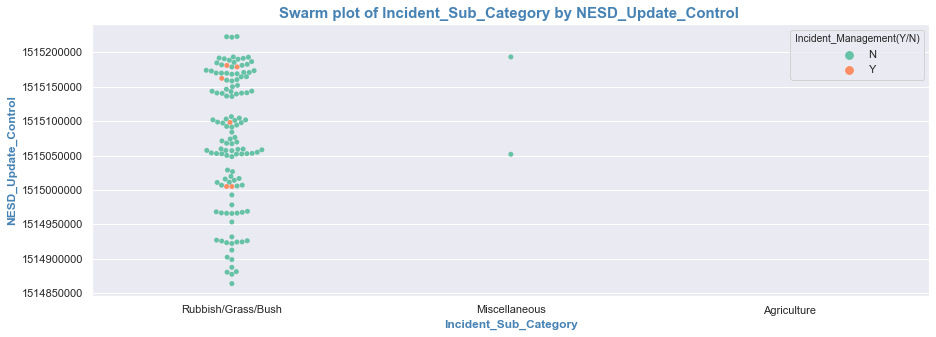

In [239]:
#Swarmplot
plt.figure(figsize=(15,5))
sns.swarmplot(x = 'Incident_Sub_Category',y = 'NESD_Update_Control', data = df_update, hue = 'Incident_Management(Y/N)',
             palette='Set2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Incident_Sub_Category', size = 12, color = 'steelblue',weight = 'bold')
plt.ylabel('NESD_Update_Control', size = 12, color = 'steelblue',weight = 'bold')
plt.title('Swarm plot of Incident_Sub_Category by NESD_Update_Control ', size = 15, color = 'steelblue', weight = 'bold')

# Text Analytics using NLP

In [240]:
#Get the first 5 observation of the dataset
df.head()

,Incident_Number,Incident_Category,Incident_Sub_Category,Date_Of_IncidentD,Time_Of_IncidentMT,Method_Incident_Notified,Callers_Statement,Location,Complex,Street,...,Pumping_Time,Fire_Damage_Details,Forced_Entry,Remarks,Accoun_ For,District,Station_Responded,Fire_Category,Incident_Management(Y/N),NESD_Update_Control
0,F0901/0001,Other,Rubbish/Grass/Bush,2009-01-01,00:03|00:04|00:04|00:04,Telephone,Vegetation Alight,NaN,NaN,BUREN STREET,...,NaN,NaN,NaN,NaN,NaN,North,Milnerton,Category 1|No Charge,NaN,1.294044e+09
1,F0901/0002,Other,Rubbish/Grass/Bush,2009-01-01,00:07|00:08|00:08|00:08,Telephone,Reeds Alight,Sandvlei Wetland Reserve,NaN,Lake Road,...,00:30,Small Area Of Reeds Burnt.,No,NaN,NaN,West,Lakeside,"Category 2|Bush, Grass, Vegetation",N,1.384005e+09
2,F0901/0004,Other,Rubbish/Grass/Bush,2009-01-01,00:16|00:17|00:17|00:17,Telephone,Vegetation Alight,Close To The Indoor Centre,Sportsfield,Tafelberg Road,...,00:16,NaN,No,NaN,NaN,East,Lansdowne,"Category 2|Bush, Grass, Vegetation",N,1.353403e+09
3,F0901/0006,Other,Rubbish/Grass/Bush,2009-01-01,00:20|00:21|00:21|00:21,Telephone,Vegetation Alight,NaN,Protea Park,Karria Street,...,NaN,NaN,NaN,NaN,NaN,North,Atlantis,"Category 2|Bush, Grass, Vegetation",N,1.294044e+09
4,F0901/0007,Other,Rubbish/Grass/Bush,2009-01-01,00:22|00:22|00:22|00:22,Telephone,Tyres Alight,NaN,NaN,JAKKALSVLEI AVENUE,...,00:05,Small Quantity Of Tyres Burned,NaN,NaN,NaN,North,Epping,"Category 2|Bush, Grass, Vegetation",N,1.467973e+09


In [247]:
#Cleaning the caller statement feature
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []

for i in range(0, 66715):
#Removing unwanted characters from commas, fullstops etc
    statement = re.sub('[^a-zA-Z]', ' ', str(df['Callers_Statement'][i]))
#Making all words small letters
    statement = statement.lower()
    statement = statement.split()
#Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes
    ps = PorterStemmer()
#Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.
    statement = [ps.stem(word) for word in statement if not word in set(stopwords.words('english'))]
    statement = ' '.join(statement)
#Adding the clean text into the empty dataframe
    corpus.append(statement)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\10022180\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [245]:
#Print the cleaned data
print(corpus)

['veget alight', 'reed alight', 'veget alight', 'veget alight', 'tyre alight', 'veget alight', 'tyre alight', 'veget alight', 'tyre alight', 'veget alight', 'hous alight opp taxi rank', 'veget alight', 'smoke issu', 'structur alight', 'contain alight', 'wood iron structur', 'veget alight', 'grass alight', 'grass alight', 'veget fire', 'veget alight', 'veget alight', 'veget fire', 'veget alight', 'veget alight', 'veget alight', 'veget fire', 'grass fire', 'veget fire', 'veget fire', 'veget fire', 'veget alight', 'veget alight', 'shack alight', 'veget alight', 'smoke issu', 'tyre alight', 'veget fire', 'veget alight', 'tyre alight', 'close shoprit', 'veget alight', 'veget alight', 'nan', 'veget alight', 'veget fire', 'veget alight', 'veget alight', 'grass alight', 'grass alight', 'grass alight', 'veget alight', 'veget alight around school ground', 'grass alight', 'veget fire', 'veget alight', 'veget fire', 'grass alight', 'veget alight', 'veget fire', 'veget alight', 'veget alight', 'veg

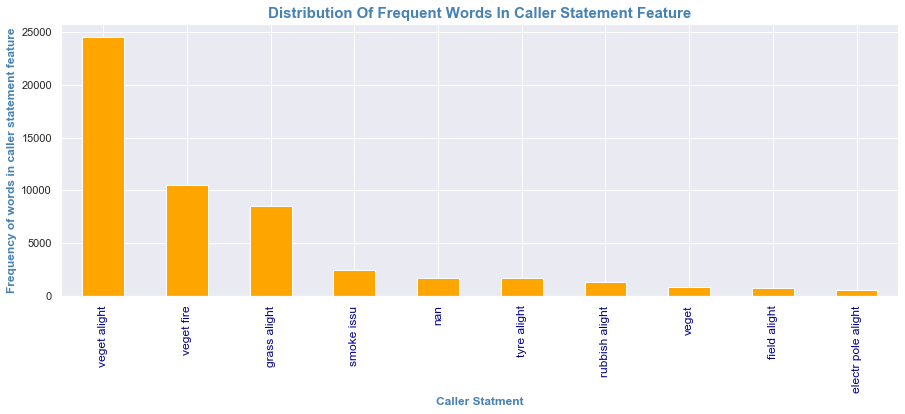

In [242]:
#Barplot of the number of values in the caller statement feature
plt.figure(figsize=(15,5))
fw_freq = pd.Series(nltk.probability.FreqDist(corpus))
fw_freq.sort_values(ascending = False)[:10].plot.bar(color = 'orange')
plt.xlabel('Caller Statment', fontsize = 12, fontweight = 'semibold',  color = 'steelblue')
plt.ylabel('Frequency of words in caller statement feature', fontsize = 12, weight = 'semibold', color = 'steelblue')
plt.xticks(color = 'darkblue', size = 12, rotation = 90)
plt.title('Distribution Of Frequent Words In Caller Statement Feature', fontsize = 15, weight = 'semibold',color = 'steelblue')
plt.show()

In [190]:
#Install word cloud
!pip install wordcloud

In [243]:
#Import the libraries
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

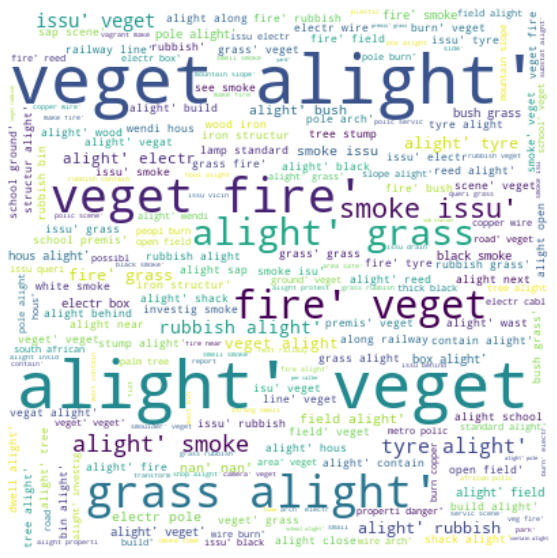

In [244]:
#Plot a graph using word cloud 
plt.figure(figsize=(20,10))
# Generate a word cloud image
wc = WordCloud(background_color = "white",max_font_size = 150, max_words = 200, width = 400, height = 400, random_state = 1).generate(str(corpus))
# Display the generated image
plt.imshow(wc, interpolation ='bilinear')
plt.axis("off")
plt.show()

In [271]:
#Drop missing values
df['Incident_Category'] = df['Incident_Category'].dropna()

In [272]:
#Creating a bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2200)
X = cv.fit_transform(corpus).toarray()
y = df['Incident_Category'].values

In [273]:
#Length of relevant words
len(X[0])

2200

In [274]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [280]:
#Choose naive bayes model
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [281]:
#Predicting the test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[['Other' 'Other']
 ['Other' 'Other']
 ['Other' 'Other']
 ...
 ['Other' 'Other']
 ['Other' 'Other']
 ['Other' 'Other']]


In [282]:
#Making a confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[13319    16]
 [    4     4]]


0.9985010867121337